# ASSIGNMENT 4

1.  Suppose performed best subset, forward stepwise, and backward stepwise selction on a single data. For each approach we get p+1 models, containing 0,1,2,...,p

    a) Which of the models with k predictors has smallest training RSS 
    
        Best subset fits p choose k models and picks lowest training RSS, forward and backward selection for k are contained with this set. Therefore best subset will always have smaller RSS.
        
        
        
        
    b) Which of the models has smallest test RSS.
    
        Unknown! If we knew why wouldn't we just pick that one all the time. 
    c)
        i) TRUE. You add a new predictor to get K+1
        ii) TRUE. You remove a predictor to get K, from K+1
        iii) FALSE. PATH DEPENDENT
        iv) FALSE. PATH DEPENDENT
        v) FALSE. 


8. 

    a) Generate X of length 100, $\epsilon$ of length 100 using the regular normal distribution.
    
    b) Create $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$, Betas are my choice
    
    c) Using best subset find best model $X,X^2,..,X^{10}$, give best model according to C_p, BIC, and adj $R^2$
    
    d) Use backward and forward selection now. 
    
    e) Lasso now
    
    f) Generate $Y = \beta_0 + \beta_7 X^7 + \epsilon$, perform lasso and best subset





## 8 A ,B ) Generate Y

In [266]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Set seed
np.random.seed(100)


#Get Vars
eps = np.random.randn(100) 
X = np.random.randn(100)

#Create array for powers of X
data = np.ones((100,10), dtype=int)
data = pd.DataFrame(data) 
#Fill the array
for i in range(0,10):
    
    data[i] = np.power(X,i+1)

#Set some header data that will be useful later 
data.columns = ["1","2","3","4","5","6","7","8","9","10"]

#Get betas
betas = np.random.randint(1,6, size =4)
betas

array([3, 2, 4, 5])

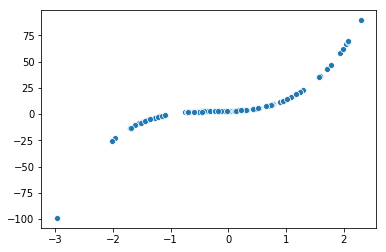

In [267]:
Y = betas[0]+ betas[1] * data['1'] + betas[2] * data['2']  + betas[3] * data['3']  

sns.scatterplot(X,Y)

c) Perform best subset selection

This is not done in python apparently, so i'm going to borrow from a few other hacky solutions. Largely one provided by smith college, found here: http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab8/Lab%208%20-%20Subset%20Selection%20in%20Python.pdf

Unfortunately, that version uses some deprecated methods and has really big problems, I've spent most of my time fixing those. Also based on your comment that AIC and $C_p$ are ordinally equvalent, I won't bother with the $C_p$ for my sanity. 

In [268]:
#This one gets the data, performs regression
#It gets a list of columns names and Y, returns a tuple of the model and RSS
def processSubset(column_set,target):
    
    model = sm.OLS(target,data[list(column_set)])
    reg = model.fit()
    RSS = ((reg.predict(data[list(column_set)]) - target) ** 2).sum()
    
    return {'model':reg, 'RSS':RSS,'column_set': column_set}

#This one gets the best model for k variables
def getBest(k,target):
    results = []
    
    #Get all k combinations
    for combo in itertools.combinations(data.columns, k):
        results.append(processSubset(combo,target))
        
    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_id = models['RSS'].idxmin()
    best_model = models.loc[best_id]
    
    # Return the best model, along with some other useful information about the model
    return best_model

#Now we need to do the above for 1,....,p, and, technically, 0.
def best_subsets(target,data):
    models = pd.DataFrame(columns=['RSS', 'model','column_set'])
    
    for i in range(1, data.shape[1]+1):
        models.loc[i] = getBest(i,target)
        
    
    return models

def add_columns(results):
    results["adj_R-sqr"]= results.apply(lambda row: row['model'].rsquared_adj, axis=1)
    results["AIC"]= results.apply(lambda row: row['model'].aic, axis=1)
    results["BIC"]= results.apply(lambda row: row['model'].bic, axis=1)
    
    return results

def print_best_models(results):
    print("--------------BEST MODELS----------------")
    print("NOTE: The numbers are powers of X")
    print("BIC: " +'\t'+ '\t'+str( results.loc[results['BIC'].idxmin()]['column_set']))
    print("AIC: " + '\t'+ '\t'+ str( results.loc[results['AIC'].idxmin()]['column_set']))
    print("adj_R-squared:\t" + str( results.loc[results['adj_R-sqr'].idxmax()]['column_set']))
    

In [269]:
results = best_subsets(target=Y,data=data)
add_columns(results)
results

,RSS,model,column_set,adj_R-sqr,AIC,BIC
1,9333.842662,<statsmodels.regression.linear_model.Regressio...,"(3,)",0.816654,739.410895,742.016065
2,609.861725,<statsmodels.regression.linear_model.Regressio...,"(2, 3)",0.987898,468.593913,473.804254
3,544.447834,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 3)",0.989085,459.247901,467.063412
4,392.294644,<statsmodels.regression.linear_model.Regressio...,"(2, 3, 4, 6)",0.992053,428.472008,438.892689
5,331.220234,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 3, 4, 6)",0.993220,413.549040,426.574890
6,257.862550,<statsmodels.regression.linear_model.Regressio...,"(2, 3, 4, 5, 6, 8)",0.994665,390.513357,406.144378
7,223.365733,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 3, 4, 6, 8, 10)",0.995329,378.151737,396.387928
8,205.402981,<statsmodels.regression.linear_model.Regressio...,"(2, 3, 4, 5, 6, 8, 9, 10)",0.995658,371.768069,392.609430
9,200.116204,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 3, 4, 6, 7, 8, 9, 10)",0.995724,371.160510,394.607042
10,199.616151,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)",0.995687,372.910316,398.962017


In [270]:
print_best_models(results)

--------------BEST MODELS----------------
NOTE: The numbers are powers of X
BIC: 		('2', '3', '4', '5', '6', '8', '9', '10')
AIC: 		('1', '2', '3', '4', '6', '7', '8', '9', '10')
adj_R-squared:	('1', '2', '3', '4', '6', '7', '8', '9', '10')


## E) FORWARD SELECTION

In [271]:
def forward_select(target, data):
    
    #Initialization
    unselected_vars= data.columns.values.tolist()
    selected_vars = [] 
    best_models = [] 
    
    
    #While there are still unselected elements, forward select
    while unselected_vars:
        results = []
        
        #Run regressions with every var that hasn't been selected
        for variable in unselected_vars:
        
            variables = selected_vars.copy()
            variables.append(variable)
            results.append(processSubset( variables,target=target))
            
        models = pd.DataFrame(results)
        
        #Find best var
        best_id = models['RSS'].idxmin()
        best_models.append( models.loc[best_id])
        
        
        #Add var name to selected by popping it off the unselected
        selected_vars.append( unselected_vars.pop(best_id))
    
    return pd.DataFrame(best_models).reset_index(drop=True)



In [272]:
results = forward_select(Y,data)
add_columns(results)
results

,RSS,column_set,model,adj_R-sqr,AIC,BIC
0,9333.842662,[3],<statsmodels.regression.linear_model.Regressio...,0.816654,739.410895,742.016065
1,609.861725,"[3, 2]",<statsmodels.regression.linear_model.Regressio...,0.987898,468.593913,473.804254
2,544.447834,"[3, 2, 1]",<statsmodels.regression.linear_model.Regressio...,0.989085,459.247901,467.063412
3,426.803695,"[3, 2, 1, 4]",<statsmodels.regression.linear_model.Regressio...,0.991354,436.903106,447.323787
4,331.220234,"[3, 2, 1, 4, 6]",<statsmodels.regression.linear_model.Regressio...,0.993220,413.549040,426.574890
5,273.294414,"[3, 2, 1, 4, 6, 8]",<statsmodels.regression.linear_model.Regressio...,0.994346,396.325653,411.956675
6,223.365733,"[3, 2, 1, 4, 6, 8, 10]",<statsmodels.regression.linear_model.Regressio...,0.995329,378.151737,396.387928
7,216.825648,"[3, 2, 1, 4, 6, 8, 10, 9]",<statsmodels.regression.linear_model.Regressio...,0.995417,377.180044,398.021406
8,200.116204,"[3, 2, 1, 4, 6, 8, 10, 9, 7]",<statsmodels.regression.linear_model.Regressio...,0.995724,371.160510,394.607042
9,199.616151,"[3, 2, 1, 4, 6, 8, 10, 9, 7, 5]",<statsmodels.regression.linear_model.Regressio...,0.995687,372.910316,398.962017


In [273]:
print_best_models(results)

--------------BEST MODELS----------------
NOTE: The numbers are powers of X
BIC: 		['3', '2', '1', '4', '6', '8', '10', '9', '7']
AIC: 		['3', '2', '1', '4', '6', '8', '10', '9', '7']
adj_R-squared:	['3', '2', '1', '4', '6', '8', '10', '9', '7']


## E) Backward Selection

In [274]:
def backward_select(target, data):
    
    #Initialization
    unselected_vars= []
    selected_vars = data.columns.values.tolist()
    best_models = []
    best_models.append(processSubset(selected_vars,target=target))
    
    
    #While there are still selected elements, backward select
    while len(selected_vars)>1:
        results = []
        
        #Run regressions by unselecting a variable which is not already unselected
        for variable in selected_vars:
        
            variables = selected_vars.copy()
            variables.remove(variable)
            results.append(processSubset( variables,target=target))
            
        models = pd.DataFrame(results)
        
        #Find best var
        best_id = models['RSS'].idxmin()
        best_models.append( models.loc[best_id])
        
        
        #Unselect the var
        unselected_vars.append( selected_vars.pop(best_id))
    
    return pd.DataFrame(best_models).reset_index(drop=True)

Something funky happens here in the first entry of the column_set, where that is supposed to be all variables. I'm not sure what's going on with that but it returns a regression model with all the variables, so it doesn't matter.

In [275]:
results = backward_select(Y,data)
add_columns(results)
results

,RSS,column_set,model,adj_R-sqr,AIC,BIC
0,199.616151,[3],<statsmodels.regression.linear_model.Regressio...,0.995687,372.910316,398.962017
1,200.116204,"[1, 2, 3, 4, 6, 7, 8, 9, 10]",<statsmodels.regression.linear_model.Regressio...,0.995724,371.160510,394.607042
2,209.130018,"[2, 3, 4, 6, 7, 8, 9, 10]",<statsmodels.regression.linear_model.Regressio...,0.995579,373.566303,394.407665
3,255.798081,"[2, 3, 4, 6, 7, 8, 10]",<statsmodels.regression.linear_model.Regressio...,0.994651,391.709527,409.945718
4,264.233586,"[2, 3, 4, 6, 7, 8]",<statsmodels.regression.linear_model.Regressio...,0.994534,392.954039,408.585060
5,359.894145,"[2, 3, 4, 6, 8]",<statsmodels.regression.linear_model.Regressio...,0.992633,421.851683,434.877533
6,392.294644,"[2, 3, 4, 6]",<statsmodels.regression.linear_model.Regressio...,0.992053,428.472008,438.892689
7,586.479106,"[2, 3, 4]",<statsmodels.regression.linear_model.Regressio...,0.988242,466.684392,474.499903
8,609.861725,"[2, 3]",<statsmodels.regression.linear_model.Regressio...,0.987898,468.593913,473.804254
9,9333.842662,[3],<statsmodels.regression.linear_model.Regressio...,0.816654,739.410895,742.016065


In [276]:
print_best_models(results)

--------------BEST MODELS----------------
NOTE: The numbers are powers of X
BIC: 		['2', '3', '4', '6', '7', '8', '9', '10']
AIC: 		['1', '2', '3', '4', '6', '7', '8', '9', '10']
adj_R-squared:	['1', '2', '3', '4', '6', '7', '8', '9', '10']


## F) LASSO with CV

Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coeﬃcient estimates, and discuss the results obtained.

Thankfully, this is done for me. I  borrowed some plotting information from the scikit learn website

array([ 10.77890967,  35.15996799, 191.38837392,   0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,  -0.        ])

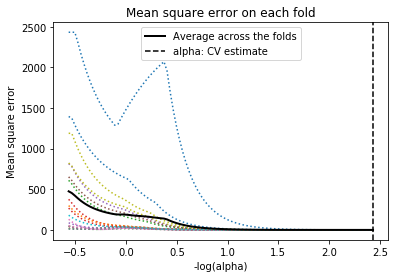

In [279]:
from sklearn.linear_model import LassoCV
from sklearn import preprocessing

#Normalizing 
x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

model = LassoCV(cv=20,max_iter=10000).fit(df, Y)

# Display results
m_log_alphas = -np.log10(model.alphas_)




plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold')
plt.axis('tight')

model.coef_

LASSO with CV managed to get exactly the right variables. 

## G) LASSO and Best Subset - New Y 

In [284]:
#Creating Y
beta = np.random.uniform(0.1, 2)
Y = beta * data['7'] + eps

#Getting Results for best subsets
results_best_subsets = best_subsets(Y,data)
add_columns(results_best_subsets)
results_best_subsets

,RSS,model,column_set,adj_R-sqr,AIC,BIC
1,93.258053,<statsmodels.regression.linear_model.Regressio...,"(7,)",0.999985,278.807730,281.412900
2,92.222910,<statsmodels.regression.linear_model.Regressio...,"(1, 7)",0.999985,279.691546,284.901886
3,91.804906,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 7)",0.999985,281.237261,289.052772
4,91.201029,<statsmodels.regression.linear_model.Regressio...,"(6, 7, 8, 10)",0.999985,282.577306,292.997987
5,90.467960,<statsmodels.regression.linear_model.Regressio...,"(1, 3, 5, 7, 9)",0.999985,283.770264,296.796115
6,87.585912,<statsmodels.regression.linear_model.Regressio...,"(5, 6, 7, 8, 9, 10)",0.999986,282.532704,298.163725
7,84.611561,<statsmodels.regression.linear_model.Regressio...,"(4, 5, 6, 7, 8, 9, 10)",0.999986,281.077779,299.313970
8,80.814344,<statsmodels.regression.linear_model.Regressio...,"(1, 3, 5, 6, 7, 8, 9, 10)",0.999986,278.486136,299.327497
9,75.978252,<statsmodels.regression.linear_model.Regressio...,"(1, 3, 4, 5, 6, 7, 8, 9, 10)",0.999987,274.315402,297.761934
10,73.217167,<statsmodels.regression.linear_model.Regressio...,"(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)",0.999987,272.613679,298.665381


In [285]:
print_best_models(results_best_subsets)

--------------BEST MODELS----------------
NOTE: The numbers are powers of X
BIC: 		('7',)
AIC: 		('1', '2', '3', '4', '5', '6', '7', '8', '9', '10')
adj_R-squared:	('1', '2', '3', '4', '5', '6', '7', '8', '9', '10')


In [288]:
model = LassoCV(cv=10,max_iter=10000).fit(df, Y)
model.coef_

array([-4.41624258e+00,  9.58487234e-01,  0.00000000e+00,  0.00000000e+00,
        2.96875242e+02, -0.00000000e+00,  2.04874649e+03, -0.00000000e+00,
        5.22456147e+02, -0.00000000e+00])

LASSO and Best subset with BIC both appear to have caught the X^7 variable. LASSO has some extra stuff in there but it its relatively small. What is interesting to me with why best_subsets works so much better here. I have no real clue. 

It's not surprinsing best_subsets didn't catch with AIC, or Adj R^2 since they don't punish the extra variables as harshly. 